In [1]:
from urllib.request import urlopen
from pyspark.sql import SparkSession, functions as F
import string

In [2]:
url = "https://raw.githubusercontent.com/kingspp/mlen_assignment/main/data.json"

jsonData = urlopen(url).read().decode('utf-8')

In [3]:
import json
sample_data = json.loads(jsonData)[:5]
sample_data

[{'jira_ticket_id': 0,
  'completed': 'yes',
  'date': '2023-03-18',
  'num_slack_messages': 237,
  'num_hours': 22.898463229813657,
  'engineer': 'Sandra',
  'ticket_description': 'reclusive initiate horseflesh Martinique crucify Julio blacktop benefit designate firebreak anise condescension page Acadia bevel skyscrape senile peacemake eft whimsic crossbar Goode comic flip sustain abstention',
  'KPIs': [{'initiative': 'New Customer', 'new_revenue': 4349.905217024631}],
  'lines_per_repo': [{'G': 52}, {'O': 23}, {'H': 31}]},
 {'jira_ticket_id': 1,
  'completed': True,
  'date': '2023-03-31',
  'num_slack_messages': 276,
  'num_hours': 62.13453815065962,
  'engineer': 'Dale',
  'ticket_description': 'Taurus both absentia Lavoisier mustache crossroad steppe suspend German necrosis debunk Humphrey eugenic differentiate audacity rodeo Steiner indiscreet Passover moonlight shadow Merriam driftwood viviparous twosome professorial',
  'KPIs': [{'initiative': 'Efficiency', 'new_revenue': 5295

In [4]:
!which python3.9

/usr/local/bin/python3.9


In [5]:
import os

os.environ["PYSPARK_PYTHON"]="/usr/local/bin/python3.9"

os.environ["PYSPARK_DRIVER_PYTHON"]="/usr/local/bin/python3.9"


In [6]:
os.environ.get('PYSPARK_PYTHON'), os.environ.get('PYSPARK_DRIVER_PYTHON')

('/usr/local/bin/python3.9', '/usr/local/bin/python3.9')

In [7]:
spark = SparkSession.builder.getOrCreate()

rdd = spark.sparkContext.parallelize([jsonData])
df = spark.read.json(rdd)

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/07/28 13:12:20 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
24/07/28 13:12:36 WARN TaskSetManager: Stage 0 contains a task of very large size (72984 KiB). The maximum recommended task size is 1000 KiB.
24/07/28 13:12:43 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


In [8]:
df.count()

24/07/28 13:12:44 WARN TaskSetManager: Stage 1 contains a task of very large size (72984 KiB). The maximum recommended task size is 1000 KiB.


100000

In [38]:
sample_df = df.where(F.col('jira_ticket_id').isNotNull())

sample_df.count()

24/07/28 13:37:52 WARN TaskSetManager: Stage 65 contains a task of very large size (72984 KiB). The maximum recommended task size is 1000 KiB.


100000

In [9]:
df.first()

24/07/27 11:15:15 WARN TaskSetManager: Stage 5 contains a task of very large size (72984 KiB). The maximum recommended task size is 1000 KiB.


Row(KPIs=[Row(initiative='New Customer', new_revenue=4349.905217024631)], completed='yes', date='2023-03-18', engineer='Sandra', jira_ticket_id=0, lines_per_repo=[Row(A=None, B=None, C=None, D=None, E=None, F=None, G=52, H=None, I=None, J=None, K=None, L=None, M=None, N=None, O=None, P=None, Q=None, R=None, S=None, T=None, U=None, V=None, W=None, X=None, Y=None, Z=None), Row(A=None, B=None, C=None, D=None, E=None, F=None, G=None, H=None, I=None, J=None, K=None, L=None, M=None, N=None, O=23, P=None, Q=None, R=None, S=None, T=None, U=None, V=None, W=None, X=None, Y=None, Z=None), Row(A=None, B=None, C=None, D=None, E=None, F=None, G=None, H=31, I=None, J=None, K=None, L=None, M=None, N=None, O=None, P=None, Q=None, R=None, S=None, T=None, U=None, V=None, W=None, X=None, Y=None, Z=None)], num_hours=22.898463229813657, num_slack_messages=237, ticket_description='reclusive initiate horseflesh Martinique crucify Julio blacktop benefit designate firebreak anise condescension page Acadia bevel

In [10]:
df.printSchema()

root
 |-- KPIs: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- initiative: string (nullable = true)
 |    |    |-- new_revenue: double (nullable = true)
 |-- completed: string (nullable = true)
 |-- date: string (nullable = true)
 |-- engineer: string (nullable = true)
 |-- jira_ticket_id: long (nullable = true)
 |-- lines_per_repo: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- A: long (nullable = true)
 |    |    |-- B: long (nullable = true)
 |    |    |-- C: long (nullable = true)
 |    |    |-- D: long (nullable = true)
 |    |    |-- E: long (nullable = true)
 |    |    |-- F: long (nullable = true)
 |    |    |-- G: long (nullable = true)
 |    |    |-- H: long (nullable = true)
 |    |    |-- I: long (nullable = true)
 |    |    |-- J: long (nullable = true)
 |    |    |-- K: long (nullable = true)
 |    |    |-- L: long (nullable = true)
 |    |    |-- M: long (nullable = true)
 |    |    |-- N: lo

In [68]:
df.where((F.col("completed") == "true") & (F.col("num_hours") > 0)).count()

24/07/28 14:24:30 WARN TaskSetManager: Stage 143 contains a task of very large size (72984 KiB). The maximum recommended task size is 1000 KiB.


28320

In [57]:
df.where(F.col("completed") == "false").count()

24/07/28 14:16:52 WARN TaskSetManager: Stage 123 contains a task of very large size (72984 KiB). The maximum recommended task size is 1000 KiB.


28562

In [58]:
df.where(F.col("completed") == "yes").count()

24/07/28 14:17:07 WARN TaskSetManager: Stage 126 contains a task of very large size (72984 KiB). The maximum recommended task size is 1000 KiB.


14429

In [59]:
df.where(F.col("completed") == "no").count()

24/07/28 14:17:24 WARN TaskSetManager: Stage 129 contains a task of very large size (72984 KiB). The maximum recommended task size is 1000 KiB.


14101

In [65]:
df.where(F.col("completed").isNull()).count()

24/07/28 14:20:40 WARN TaskSetManager: Stage 140 contains a task of very large size (72984 KiB). The maximum recommended task size is 1000 KiB.


14285

In [60]:
df.head(5)

24/07/28 14:18:32 WARN TaskSetManager: Stage 133 contains a task of very large size (72984 KiB). The maximum recommended task size is 1000 KiB.


[Row(KPIs=[Row(initiative='New Customer', new_revenue=4349.905217024631)], completed='yes', date='2023-03-18', engineer='Sandra', jira_ticket_id=0, lines_per_repo=[Row(A=None, B=None, C=None, D=None, E=None, F=None, G=52, H=None, I=None, J=None, K=None, L=None, M=None, N=None, O=None, P=None, Q=None, R=None, S=None, T=None, U=None, V=None, W=None, X=None, Y=None, Z=None), Row(A=None, B=None, C=None, D=None, E=None, F=None, G=None, H=None, I=None, J=None, K=None, L=None, M=None, N=None, O=23, P=None, Q=None, R=None, S=None, T=None, U=None, V=None, W=None, X=None, Y=None, Z=None), Row(A=None, B=None, C=None, D=None, E=None, F=None, G=None, H=31, I=None, J=None, K=None, L=None, M=None, N=None, O=None, P=None, Q=None, R=None, S=None, T=None, U=None, V=None, W=None, X=None, Y=None, Z=None)], num_hours=22.898463229813657, num_slack_messages=237, ticket_description='reclusive initiate horseflesh Martinique crucify Julio blacktop benefit designate firebreak anise condescension page Acadia beve

## Q1 : What is the longest Jira ticket description?

In [13]:
##Brute Force Method

max_length = 0

for row in df.rdd.toLocalIterator():
        if len(row["ticket_description"]) > max_length:
            max_length = len(row["ticket_description"])
            long_ticket = row['ticket_description']

print(max_length)
spark = SparkSession.builder.getOrCreate()

res = spark.createDataFrame([{'ticket_description': long_ticket}])
print(res.collect())

24/07/27 11:15:23 WARN TaskSetManager: Stage 12 contains a task of very large size (72984 KiB). The maximum recommended task size is 1000 KiB.


895
[Row(ticket_description='Carmela sibling musicology patron gunpoint Canfield mammal Santayana Freddie Waterhouse estuary eligible Todd bashaw repellent Jovanovich integrity windbreak halide pestilential italic desiccate Hanoverian Riordan Lathrop connotative ratify Chattanooga phenol enjoinder chase breakdown alkaloid homology cleric consistent pickle rather Barney dogma crocodile liaison endometrial embroider methodology within marketeer cope patrol paycheck Nevins Spokane theorem Jorgensen Wilma transoceanic Mansfield arboretum attribution chemistry Woodbury Cottrell prosodic lox fallacious tachyon coprocessor Furman putdown Pickford goose ignition icosahedral chemic reconnaissance aggravate marinade furthest converge Apocrypha formula cocky landlocked Hopkins stamp Bennington injudicious bulletin spontaneous whalebone prolific scavenge aliphatic balsam offprint shepherdess underling Banbury Rebecca flush')]


In [19]:
longest_description_row = df.withColumn("description_length", F.length(F.col("ticket_description"))) \
                            .orderBy(F.col("description_length").desc()).first()

longest_description = longest_description_row["ticket_description"]
jira_ticket_id = longest_description_row["jira_ticket_id"]

# longest_description_row.collect()

24/07/27 12:34:37 WARN TaskSetManager: Stage 24 contains a task of very large size (72984 KiB). The maximum recommended task size is 1000 KiB.


## Q2 : Which repo had the most lines of code added?

In [16]:
# Brute Force

max_length = 0

all_upper_chars = {char:0 for char in list(string.ascii_uppercase)}

for row in df.rdd.toLocalIterator():
    for repo in row['lines_per_repo']:
        for char in all_upper_chars:
            if repo[char]:
                all_upper_chars[char] += repo[char]

max_repo = max(all_upper_chars, key=all_upper_chars.get)

# print(max_length)
spark = SparkSession.builder.getOrCreate()

res = spark.createDataFrame([{'repo': max_repo}])
# print(res.collect())

24/07/27 12:33:55 WARN TaskSetManager: Stage 23 contains a task of very large size (72984 KiB). The maximum recommended task size is 1000 KiB.


In [17]:
print(all_upper_chars)

{'A': 576507, 'B': 583263, 'C': 575486, 'D': 579199, 'E': 578629, 'F': 587859, 'G': 579507, 'H': 589558, 'I': 578110, 'J': 589083, 'K': 579684, 'L': 584731, 'M': 585300, 'N': 570306, 'O': 581491, 'P': 578376, 'Q': 576703, 'R': 577720, 'S': 582853, 'T': 584022, 'U': 586047, 'V': 581735, 'W': 578261, 'X': 570098, 'Y': 578500, 'Z': 589610}


In [18]:
print(max_repo)

Z


In [53]:
repos_df = df.selectExpr("inline(lines_per_repo)")

repo_lines_df = repos_df.groupBy().sum().collect()[0].asDict()
print(repo_lines_df)
most_lines_repo = max(repo_lines_df, key=repo_lines_df.get)
total_lines = repo_lines_df[most_lines_repo]

print(f"The repository with the most lines of code added is {most_lines_repo} with {total_lines} lines.")


24/07/28 14:11:58 WARN TaskSetManager: Stage 115 contains a task of very large size (72984 KiB). The maximum recommended task size is 1000 KiB.


{'sum(A)': 576507, 'sum(B)': 583263, 'sum(C)': 575486, 'sum(D)': 579199, 'sum(E)': 578629, 'sum(F)': 587859, 'sum(G)': 579507, 'sum(H)': 589558, 'sum(I)': 578110, 'sum(J)': 589083, 'sum(K)': 579684, 'sum(L)': 584731, 'sum(M)': 585300, 'sum(N)': 570306, 'sum(O)': 581491, 'sum(P)': 578376, 'sum(Q)': 576703, 'sum(R)': 577720, 'sum(S)': 582853, 'sum(T)': 584022, 'sum(U)': 586047, 'sum(V)': 581735, 'sum(W)': 578261, 'sum(X)': 570098, 'sum(Y)': 578500, 'sum(Z)': 589610}
The repository with the most lines of code added is sum(Z) with 589610 lines.


In [19]:
df.select('engineer').distinct().show()

24/07/26 17:54:24 WARN TaskSetManager: Stage 8 contains a task of very large size (72984 KiB). The maximum recommended task size is 1000 KiB.


+--------+
|engineer|
+--------+
|    Josh|
|   daisy|
|    dale|
|    Dale|
|    null|
|    Alex|
|  sandra|
|  Sandra|
|    alex|
|    josh|
|   Daisy|
+--------+



## Q3 : Provide the maximum number of Slack messages in any ticket for each engineer

In [21]:
engineer_messages = {}

for row in df.rdd.toLocalIterator():
    if row['engineer']:
        engineer = row['engineer'].title()
    else:
        continue
    engineer_messages[engineer] = max(row['num_slack_messages'], engineer_messages.get(engineer, 0))

spark = SparkSession.builder.getOrCreate()

res = spark.createDataFrame([sorted(engineer_messages.items())])

24/07/27 12:36:34 WARN TaskSetManager: Stage 31 contains a task of very large size (72984 KiB). The maximum recommended task size is 1000 KiB.


In [22]:
print(sorted(engineer_messages.items()))

[('Alex', 500), ('Daisy', 500), ('Dale', 500), ('Josh', 500), ('Sandra', 500)]


In [23]:
[{"engineer":key, "max_messages":value} for key, value in sorted(engineer_messages.items())]

[{'engineer': 'Alex', 'max_messages': 500},
 {'engineer': 'Daisy', 'max_messages': 500},
 {'engineer': 'Dale', 'max_messages': 500},
 {'engineer': 'Josh', 'max_messages': 500},
 {'engineer': 'Sandra', 'max_messages': 500}]

In [32]:
engineer_messages = df.withColumn("engineer", F.lower(F.col("engineer"))).filter(F.col("engineer").isNotNull())

engineer_messages = engineer_messages.groupBy("engineer").agg(F.max("num_slack_messages").alias('max_messages'))

engineer_messages = engineer_messages.withColumn("engineer", F.initcap(F.col("engineer")))

engineer_messages = engineer_messages.orderBy(F.col("engineer"))

In [33]:
engineer_messages.show()

24/07/27 12:40:22 WARN TaskSetManager: Stage 38 contains a task of very large size (72984 KiB). The maximum recommended task size is 1000 KiB.


+--------+------------+
|engineer|max_messages|
+--------+------------+
|    Alex|         500|
|   Daisy|         500|
|    Dale|         500|
|    Josh|         500|
|  Sandra|         500|
+--------+------------+



## Q4 : Mean hours spent on a ticket in June 2023

In [80]:
df_with_dates = df.withColumn("date_clean", F.to_date(df.date, "yyyy-MM-dd"))

In [81]:
df_with_dates.show(2)

24/07/28 15:29:02 WARN TaskSetManager: Stage 201 contains a task of very large size (72984 KiB). The maximum recommended task size is 1000 KiB.


+--------------------+---------+----------+--------+--------------+--------------------+------------------+------------------+--------------------+----------+
|                KPIs|completed|      date|engineer|jira_ticket_id|      lines_per_repo|         num_hours|num_slack_messages|  ticket_description|date_clean|
+--------------------+---------+----------+--------+--------------+--------------------+------------------+------------------+--------------------+----------+
|[{New Customer, 4...|      yes|2023-03-18|  Sandra|             0|[{null, null, nul...|22.898463229813657|               237|reclusive initiat...|2023-03-18|
|[{Efficiency, 529...|     true|2023-03-31|    Dale|             1|[{null, null, nul...| 62.13453815065962|               276|Taurus both absen...|2023-03-31|
+--------------------+---------+----------+--------+--------------+--------------------+------------------+------------------+--------------------+----------+
only showing top 2 rows



In [82]:
filtered_df = df_with_dates.where((F.col("date_clean") > '2023-05-31') & (F.col("date_clean") < "2023-07-01") & (F.col("num_hours")>=0))



In [83]:
filtered_df.count()

24/07/28 15:29:47 WARN TaskSetManager: Stage 202 contains a task of very large size (72984 KiB). The maximum recommended task size is 1000 KiB.


7989

In [89]:
a = filtered_df.agg(F.mean("num_hours").alias("mean_hours"))

In [90]:
a.collect()

24/07/28 15:32:59 WARN TaskSetManager: Stage 208 contains a task of very large size (72984 KiB). The maximum recommended task size is 1000 KiB.


[Row(mean_hours=50.224304209517776)]

In [87]:
401241.9663298375/8070

49.72019409291667

In [91]:
hash_util(f"[Row(mean_hours=50.224304209517776)]")

'0a15804cce114a019e52b696bba68912'

In [53]:
filtered_df = df_with_dates.where((F.col("date_clean") > '2023-05-31') & (F.col("date_clean") < "2023-07-01"))

In [54]:
filtered_df.count()

24/07/26 19:43:04 WARN TaskSetManager: Stage 47 contains a task of very large size (72984 KiB). The maximum recommended task size is 1000 KiB.


8070

In [55]:
filtered_df.show(2)

24/07/26 19:43:09 WARN TaskSetManager: Stage 51 contains a task of very large size (72984 KiB). The maximum recommended task size is 1000 KiB.


+--------------------+---------+----------+--------+--------------+--------------------+------------------+------------------+--------------------+----------+
|                KPIs|completed|      date|engineer|jira_ticket_id|      lines_per_repo|         num_hours|num_slack_messages|  ticket_description|date_clean|
+--------------------+---------+----------+--------+--------------+--------------------+------------------+------------------+--------------------+----------+
|[{New Customer, 9...|    false|2023-06-22|    Josh|            22|[{null, null, nul...|45.486788049107695|               366|spitfire aorta ji...|2023-06-22|
|[{Support, 5590.8...|       no|2023-06-16|    Dale|            28|[{null, null, nul...| 3.239738889499544|               194|spheroid wobble c...|2023-06-16|
+--------------------+---------+----------+--------+--------------+--------------------+------------------+------------------+--------------------+----------+
only showing top 2 rows



In [56]:
num_hours = filtered_df.select(F.col("num_hours"))

num_hours.show(2)

24/07/26 19:43:12 WARN TaskSetManager: Stage 53 contains a task of very large size (72984 KiB). The maximum recommended task size is 1000 KiB.


+------------------+
|         num_hours|
+------------------+
|45.486788049107695|
| 3.239738889499544|
+------------------+
only showing top 2 rows



In [57]:
# sum_hours = F.sum(num_hours['num_hours'])

# sum_hours.show()

In [62]:
a = filtered_df.agg(F.sum("num_hours").alias("total_hours"))
a.show()

24/07/26 19:43:34 WARN TaskSetManager: Stage 54 contains a task of very large size (72984 KiB). The maximum recommended task size is 1000 KiB.


+-----------------+
|      total_hours|
+-----------------+
|397287.8618578641|
+-----------------+



In [63]:
a = filtered_df.agg(F.mean("num_hours").alias("total_hours"))
a.show()

24/07/26 19:43:41 WARN TaskSetManager: Stage 57 contains a task of very large size (72984 KiB). The maximum recommended task size is 1000 KiB.


+-----------------+
|      total_hours|
+-----------------+
|49.23021832191624|
+-----------------+



In [ ]:
397287.8618578641/8070

In [64]:
a = filtered_df.agg(F.avg("num_hours").alias("total_hours"))
a.show()

24/07/26 19:46:24 WARN TaskSetManager: Stage 60 contains a task of very large size (72984 KiB). The maximum recommended task size is 1000 KiB.


+-----------------+
|      total_hours|
+-----------------+
|49.23021832191624|
+-----------------+



In [46]:
397287.8618578641/8070

49.23021832191624

In [107]:
a = filtered_df.agg(F.sum("num_hours").alias("total_hours"))
a.collect()

24/07/25 22:54:29 WARN TaskSetManager: Stage 123 contains a task of very large size (72984 KiB). The maximum recommended task size is 1000 KiB.


[Row(total_hours=397287.8618578641)]

In [72]:
filtered_df.agg(sum("num_hours").cast('double'))


# sum("steps").cast("long")

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [26]:
df.select('completed').distinct().show()

24/07/28 13:27:35 WARN TaskSetManager: Stage 26 contains a task of very large size (72984 KiB). The maximum recommended task size is 1000 KiB.


+---------+
|completed|
+---------+
|     null|
|    false|
|       no|
|      yes|
|     true|
+---------+



In [76]:
repo_a = 0

for row in df.rdd.toLocalIterator():
    if row['completed'] in ["true"]:
        for repo in row['lines_per_repo']:
            if repo["A"]:
                repo_a += repo["A"]

# print(max_length)
spark = SparkSession.builder.getOrCreate()

res = spark.createDataFrame([{'total': repo_a}])
res.collect()

24/07/27 15:19:27 WARN TaskSetManager: Stage 168 contains a task of very large size (72984 KiB). The maximum recommended task size is 1000 KiB.


[Row(total=163514)]

In [17]:
327542 +248965

576507

In [7]:
df.printSchema()

root
 |-- KPIs: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- initiative: string (nullable = true)
 |    |    |-- new_revenue: double (nullable = true)
 |-- completed: string (nullable = true)
 |-- date: string (nullable = true)
 |-- engineer: string (nullable = true)
 |-- jira_ticket_id: long (nullable = true)
 |-- lines_per_repo: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- A: long (nullable = true)
 |    |    |-- B: long (nullable = true)
 |    |    |-- C: long (nullable = true)
 |    |    |-- D: long (nullable = true)
 |    |    |-- E: long (nullable = true)
 |    |    |-- F: long (nullable = true)
 |    |    |-- G: long (nullable = true)
 |    |    |-- H: long (nullable = true)
 |    |    |-- I: long (nullable = true)
 |    |    |-- J: long (nullable = true)
 |    |    |-- K: long (nullable = true)
 |    |    |-- L: long (nullable = true)
 |    |    |-- M: long (nullable = true)
 |    |    |-- N: lo

In [43]:
engineer_revenue = {}

for row in df.rdd.toLocalIterator():
    if row['engineer']:
        engineer = row['engineer'].lower()
    else:
        continue
    
    
    
    for initiative in row['KPIs']:
        if engineer not in engineer_revenue:
            engineer_revenue[engineer] = {initiative["initiative"]:initiative["new_revenue"]}
        else:
            engineer_revenue[engineer][initiative["initiative"]] = engineer_revenue[engineer].get(initiative["initiative"], 0) + initiative["new_revenue"] 

# spark = SparkSession.builder.getOrCreate()

# res = spark.createDataFrame([sorted(engineer_messages.items())])

24/07/27 14:42:27 WARN TaskSetManager: Stage 48 contains a task of very large size (72984 KiB). The maximum recommended task size is 1000 KiB.


In [44]:
sorted(engineer_revenue)

['alex', 'daisy', 'dale', 'josh', 'sandra']

In [45]:
result_list = []
for engineer, kpis in sorted(engineer_revenue.items()):
    result_list.append({"engineer":engineer.title(), "KPIs":[{"initiative":initiative, "total_revenue":revenue} for initiative, revenue in sorted(kpis.items())]})

In [46]:
result_list

[{'engineer': 'Alex',
  'KPIs': [{'initiative': 'Efficiency', 'total_revenue': 42471450.113421},
   {'initiative': 'New Customer', 'total_revenue': 42395392.14021012},
   {'initiative': 'Support', 'total_revenue': 40861860.65269816}]},
 {'engineer': 'Daisy',
  'KPIs': [{'initiative': 'Efficiency', 'total_revenue': 41657467.52959909},
   {'initiative': 'New Customer', 'total_revenue': 42091111.32835262},
   {'initiative': 'Support', 'total_revenue': 41614545.78419974}]},
 {'engineer': 'Dale',
  'KPIs': [{'initiative': 'Efficiency', 'total_revenue': 41948273.19711389},
   {'initiative': 'New Customer', 'total_revenue': 41565950.9542528},
   {'initiative': 'Support', 'total_revenue': 41653299.24840867}]},
 {'engineer': 'Josh',
  'KPIs': [{'initiative': 'Efficiency', 'total_revenue': 41320782.330890015},
   {'initiative': 'New Customer', 'total_revenue': 42138923.04361266},
   {'initiative': 'Support', 'total_revenue': 42248591.12688083}]},
 {'engineer': 'Sandra',
  'KPIs': [{'initiative':

In [39]:
#4. gpt
max_slack_messages_df = df.groupBy("engineer") \
    .agg(F.max("num_slack_messages").alias("max_messages")).orderBy(F.col("engineer").desc())

# Show the result
max_slack_messages_df.show()

# If you need to collect the result as a dictionary
result = {row['engineer']: row['max_slack_messages'] for row in max_slack_messages_df.collect()}

print(result)

24/07/26 19:06:06 WARN TaskSetManager: Stage 21 contains a task of very large size (72984 KiB). The maximum recommended task size is 1000 KiB.


+--------+------------+
|engineer|max_messages|
+--------+------------+
|  sandra|         500|
|    josh|         500|
|    dale|         500|
|   daisy|         500|
|    alex|         500|
|  Sandra|         500|
|    Josh|         500|
|    Dale|         500|
|   Daisy|         500|
|    Alex|         500|
|    null|         500|
+--------+------------+



24/07/26 19:06:10 WARN TaskSetManager: Stage 24 contains a task of very large size (72984 KiB). The maximum recommended task size is 1000 KiB.


ValueError: max_slack_messages

In [42]:
# Filter tickets for June 2023
june_tickets_df = df.filter((F.month(F.col("date")) == 6) & (F.year(F.col("date")) == 2023))

# Calculate mean hours spent on a ticket in June 2023
mean_hours_june_2023 = june_tickets_df.agg(F.avg("num_hours").alias("mean_hours")).first()

24/07/26 19:10:14 WARN TaskSetManager: Stage 32 contains a task of very large size (72984 KiB). The maximum recommended task size is 1000 KiB.


In [43]:
mean_hours_june_2023

Row(mean_hours=49.23021832191624)

In [96]:
from pyspark.sql import functions



engineer_column_name: str = "engineer"
kpi_column_name: str = "KPIs"
kpi_initiative_column_name: str = "initiative"
kpi_revenue_column_name: str = "new_revenue"
total_revenue_column_name: str = "total_revenue"
output_column_name: str = "KPIs"
kpis_initiaitive_ascending: bool = True
engineers_ascending: bool = True
filter_null_engineers: bool = True

new_df = df.withColumn("engineer", F.initcap(F.col("engineer"))).filter(F.col("engineer").isNotNull())

working_data = new_df.select(
            engineer_column_name,
            functions.inline(
                df[kpi_column_name].alias(
                    kpi_initiative_column_name, kpi_revenue_column_name
                )
            ),
        )


grouped_data = working_data.groupBy(engineer_column_name, kpi_initiative_column_name)

revenue_data = grouped_data.agg(
    functions.sum(kpi_revenue_column_name).alias(total_revenue_column_name)
)

sorted_revenue_data = revenue_data.sort(
    kpi_initiative_column_name, ascending=kpis_initiaitive_ascending
)

structed_data = sorted_revenue_data.select(
    engineer_column_name,
    functions.struct(kpi_initiative_column_name, total_revenue_column_name).alias(
        output_column_name
    ),
)

grouped_data = structed_data.groupBy(engineer_column_name)
output_data = grouped_data.agg(
    functions.collect_list(output_column_name).alias(output_column_name)
)

if filter_null_engineers:
    filtered_data = output_data.filter(output_data[engineer_column_name].isNotNull())
else:
    filtered_data = output_data
    
filtered_data = filtered_data.withColumn("engineer", F.initcap(F.col("engineer")))

# Show the resulting DataFrame

# Order by engineer name
filtered_data = filtered_data.orderBy(F.col("engineer"))
    
    
filtered_data

DataFrame[engineer: string, KPIs: array<struct<initiative:string,total_revenue:double>>]

In [97]:
filtered_data.collect()


24/07/28 15:47:28 WARN TaskSetManager: Stage 242 contains a task of very large size (72984 KiB). The maximum recommended task size is 1000 KiB.


[Row(engineer='Alex', KPIs=[Row(initiative='Efficiency', total_revenue=42471450.113421), Row(initiative='New Customer', total_revenue=42395392.14021012), Row(initiative='Support', total_revenue=40861860.65269816)]),
 Row(engineer='Daisy', KPIs=[Row(initiative='Efficiency', total_revenue=41657467.52959909), Row(initiative='New Customer', total_revenue=42091111.32835262), Row(initiative='Support', total_revenue=41614545.78419974)]),
 Row(engineer='Dale', KPIs=[Row(initiative='Efficiency', total_revenue=41948273.19711389), Row(initiative='New Customer', total_revenue=41565950.9542528), Row(initiative='Support', total_revenue=41653299.24840867)]),
 Row(engineer='Josh', KPIs=[Row(initiative='Efficiency', total_revenue=41320782.330890015), Row(initiative='New Customer', total_revenue=42138923.04361266), Row(initiative='Support', total_revenue=42248591.12688083)]),
 Row(engineer='Sandra', KPIs=[Row(initiative='Efficiency', total_revenue=41194296.447811455), Row(initiative='New Customer', tota

In [98]:
hash_util(filtered_data.collect())

'7449eea8ff4ebefdd9dc4d80d3812497'

In [22]:
import hashlib

def hash_util(obj) -> str:
    """Function to return the hash of the object

    Args:
        obj (_type_): Object can be of type string, int, float, Pyspark Row, list of Pyspark Rows,
        any objetct that can be projected in string format

    Returns:
        str: Hash of the object
    """
    return hashlib.md5(str(obj).encode("utf-8")).hexdigest()




In [77]:
hash_util("[Row(total=168195)]")


'6adec64b2a723c9a52024c53068f264d'

In [112]:
import math

repo_a = 0

for row in df.rdd.toLocalIterator():
    if row['completed'] in ["true", "yes"] and row["num_hours"] >0 and row["engineer"] and row["ticket_description"]:
        a_list = []
        for repo in row['lines_per_repo']:
            if repo["A"]:
                a_list.append(repo["A"])
                if repo["A"]<0:
                    print("neg", repo["A"])
#         if len(a_list) >1:
#             print("a list", a_list)
                
        repo_a += max(a_list) if a_list else 0

# print(max_length)
spark = SparkSession.builder.getOrCreate()

res = spark.createDataFrame([{'total': repo_a}])
res.collect()

24/07/28 15:58:45 WARN TaskSetManager: Stage 328 contains a task of very large size (72984 KiB). The maximum recommended task size is 1000 KiB.


a list [73, 89]
a list [98, 98]
a list [100, 5]
a list [39, 16]
a list [79, 47]
a list [54, 48]
a list [40, 96]
a list [25, 7]
a list [97, 13]
a list [96, 99]
a list [48, 57]
a list [96, 17]
a list [26, 96]
a list [18, 96]
a list [81, 87]
a list [10, 70]
a list [4, 35]
a list [79, 44, 11]
a list [56, 64]
a list [4, 76]
a list [29, 4]
a list [35, 51]
a list [72, 32, 71]
a list [16, 93]
a list [65, 14]
a list [66, 67]
a list [18, 25]
a list [60, 17]
a list [45, 47]
a list [25, 51]
a list [97, 41, 54]
a list [95, 41]
a list [20, 98]
a list [47, 36]
a list [20, 42]
a list [37, 15]
a list [21, 31]
a list [66, 29]
a list [18, 77]
a list [27, 64]
a list [72, 75]
a list [94, 5]
a list [81, 57]
a list [50, 91]
a list [38, 17]
a list [14, 55]
a list [72, 35]
a list [72, 80]
a list [69, 27]
a list [49, 11]
a list [68, 8]
a list [63, 43]
a list [13, 1]
a list [63, 13]
a list [98, 30]
a list [29, 48]
a list [4, 81]
a list [40, 30]
a list [88, 42]
a list [59, 3]
a list [7, 29]
a list [89, 10]
a list

[Row(total=196584)]

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

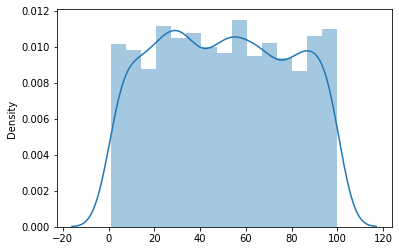

In [41]:
import seaborn as sns
sns.distplot(repo_a_list)

In [52]:
df.count()

24/07/28 14:09:31 WARN TaskSetManager: Stage 112 contains a task of very large size (72984 KiB). The maximum recommended task size is 1000 KiB.


100000

In [71]:
import math

repo_a = 0

for row in df.rdd.toLocalIterator():
    if row['completed'] in ["yes"] and row['num_hours'] > 0 and row['engineer']:
        for repo in row['lines_per_repo']:
            if repo["A"]:
                if repo["A"]<0:
                    print("neg", repo["A"])
                repo_a += repo["A"]

# print(max_length)
spark = SparkSession.builder.getOrCreate()

res = spark.createDataFrame([{'total': repo_a}])
res.collect()

24/07/28 14:26:43 WARN TaskSetManager: Stage 159 contains a task of very large size (72984 KiB). The maximum recommended task size is 1000 KiB.


[Row(total=67575)]

In [39]:
import math

repo_a = 0

for row in df.rdd.toLocalIterator():
    if row['completed'] not in ["no", "yes", "true", "false"]:
        for repo in row['lines_per_repo']:
            if repo["A"]:
                if repo["A"]<0:
                    print("neg", repo["A"])
                repo_a += repo["A"]
print(row["completed"])

# print(max_length)
spark = SparkSession.builder.getOrCreate()

res = spark.createDataFrame([{'total': repo_a}])
res.collect()

24/07/28 13:40:07 WARN TaskSetManager: Stage 71 contains a task of very large size (72984 KiB). The maximum recommended task size is 1000 KiB.


yes


[Row(total=79983)]

In [30]:
import math

repo_a = 0

for row in df.rdd.toLocalIterator():
    if row['completed'] in ["false"]:
        for repo in row['lines_per_repo']:
            if repo["A"]:
                if repo["A"]<0:
                    print("neg", repo["A"])
                repo_a += repo["A"]

# print(max_length)
spark = SparkSession.builder.getOrCreate()

res = spark.createDataFrame([{'total': repo_a}])
res.collect()

24/07/28 13:30:47 WARN TaskSetManager: Stage 47 contains a task of very large size (72984 KiB). The maximum recommended task size is 1000 KiB.


[Row(total=170471)]

In [31]:
import math

repo_a = 0

for row in df.rdd.toLocalIterator():
    if row['completed'] in ["no"]:
        for repo in row['lines_per_repo']:
            if repo["A"]:
                if repo["A"]<0:
                    print("neg", repo["A"])
                repo_a += repo["A"]

# print(max_length)
spark = SparkSession.builder.getOrCreate()

res = spark.createDataFrame([{'total': repo_a}])
res.collect()

24/07/28 13:30:56 WARN TaskSetManager: Stage 52 contains a task of very large size (72984 KiB). The maximum recommended task size is 1000 KiB.


[Row(total=78494)]

In [131]:
completed_tickets_df = df.where((F.col("completed") == 'true') | (F.col("completed") == 'yes'))

completed_tickets_df = completed_tickets_df.selectExpr("inline(lines_per_repo)")



In [132]:
completed_tickets_df.count()

24/07/27 19:48:46 WARN TaskSetManager: Stage 279 contains a task of very large size (72984 KiB). The maximum recommended task size is 1000 KiB.


128883

In [135]:
completed_tickets_df.head(10)

24/07/27 19:49:26 WARN TaskSetManager: Stage 285 contains a task of very large size (72984 KiB). The maximum recommended task size is 1000 KiB.


[Row(A=None, B=None, C=None, D=None, E=None, F=None, G=52, H=None, I=None, J=None, K=None, L=None, M=None, N=None, O=None, P=None, Q=None, R=None, S=None, T=None, U=None, V=None, W=None, X=None, Y=None, Z=None),
 Row(A=None, B=None, C=None, D=None, E=None, F=None, G=None, H=None, I=None, J=None, K=None, L=None, M=None, N=None, O=23, P=None, Q=None, R=None, S=None, T=None, U=None, V=None, W=None, X=None, Y=None, Z=None),
 Row(A=None, B=None, C=None, D=None, E=None, F=None, G=None, H=31, I=None, J=None, K=None, L=None, M=None, N=None, O=None, P=None, Q=None, R=None, S=None, T=None, U=None, V=None, W=None, X=None, Y=None, Z=None),
 Row(A=None, B=None, C=None, D=None, E=None, F=None, G=42, H=None, I=None, J=None, K=None, L=None, M=None, N=None, O=None, P=None, Q=None, R=None, S=None, T=None, U=None, V=None, W=None, X=None, Y=None, Z=None),
 Row(A=None, B=None, C=None, D=None, E=None, F=None, G=None, H=None, I=None, J=None, K=None, L=None, M=None, N=None, O=None, P=None, Q=None, R=None, S=1

In [136]:
repo_lines_df = completed_tickets_df.groupBy().sum().collect()[0].asDict()


24/07/27 19:50:41 WARN TaskSetManager: Stage 286 contains a task of very large size (72984 KiB). The maximum recommended task size is 1000 KiB.


In [138]:
repo_lines_df

{'sum(A)': 247559,
 'sum(B)': 253158,
 'sum(C)': 250684,
 'sum(D)': 240933,
 'sum(E)': 248884,
 'sum(F)': 254996,
 'sum(G)': 246059,
 'sum(H)': 254152,
 'sum(I)': 242749,
 'sum(J)': 256171,
 'sum(K)': 251816,
 'sum(L)': 253104,
 'sum(M)': 253858,
 'sum(N)': 247243,
 'sum(O)': 245110,
 'sum(P)': 255385,
 'sum(Q)': 237914,
 'sum(R)': 252450,
 'sum(S)': 247105,
 'sum(T)': 252279,
 'sum(U)': 255304,
 'sum(V)': 246309,
 'sum(W)': 246937,
 'sum(X)': 245948,
 'sum(Y)': 252936,
 'sum(Z)': 251982}